<a href="https://colab.research.google.com/github/21-501/ds1/blob/main/slashmark4sm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
data = load_iris()

In [ ]:
X=data.data
y=data.target



artificail neural network by back propagation


In [ ]:
y = pd.get_dummies(y).values



In [ ]:
y[:3]

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)



In [ ]:
# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2

# number of neurons at the output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])


In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()


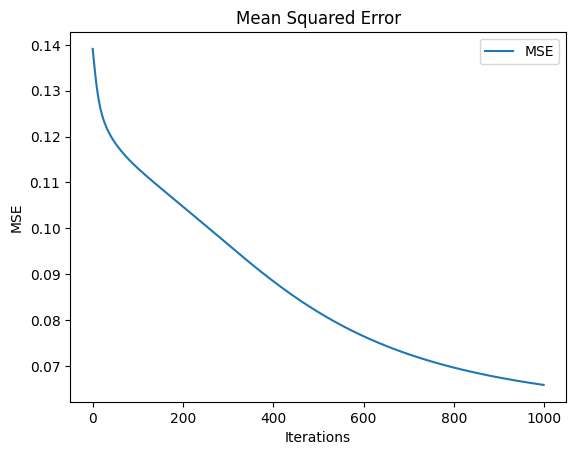

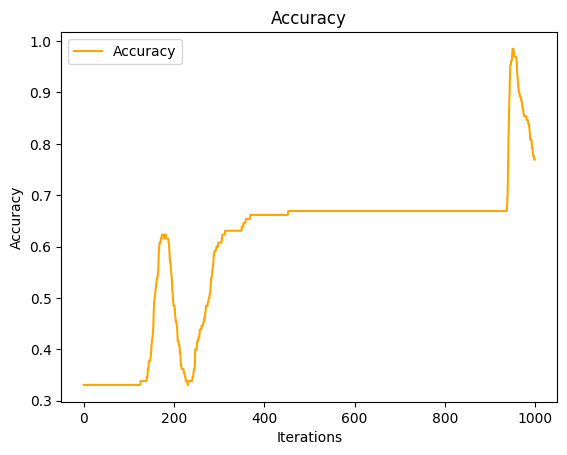

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store MSE and accuracy values
mse_values = []
accuracy_values = []

# Number of iterations (make sure this variable is defined)
iterations = 1000

for itr in range(iterations):
    # Feedforward propagation
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculating error and accuracy
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)

    # Append MSE and accuracy values to lists
    mse_values.append(mse)
    accuracy_values.append(acc)

    # Backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # Weight updates
    W2_update = np.dot(A1.T, dW1) / len(X_train)
    W1_update = np.dot(X_train.T, dW2) / len(X_train)

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

# Plotting the MSE values
plt.figure()
plt.plot(range(iterations), mse_values, label='MSE')
plt.title('Mean Squared Error')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting the accuracy values
plt.figure()
plt.plot(range(iterations), accuracy_values, label='Accuracy', color='orange')
plt.title('Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:

# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.85
